In [40]:
import fitsio
import lusee
import healpy as hp
import matplotlib
font = {'size'   : 22}
matplotlib.rc('font', **font)
import os


In [41]:
sky = lusee.sky.FitsSky(os.environ['LUSEE_DRIVE_DIR']+"/Simulations/SkyModels/ULSA_32_ddi_smooth.fits",lmax=1)
skymeans = sky.maps.mean(axis=1)
freq = sky.freq

In [42]:
import astropy.units as u
T_NB= lusee.monosky.T_NB(freq)
T_C= lusee.monosky.T_C(freq)
TskyApprox = lusee.monosky.T_J

[]

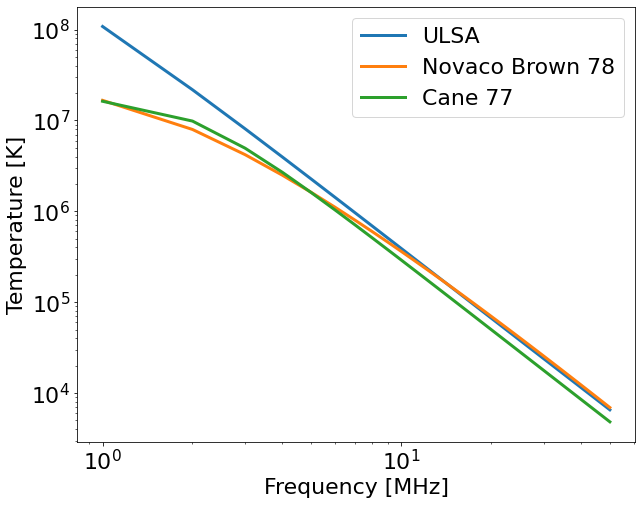

In [43]:
plt.figure(figsize=(10,8))
plt.plot(freq,skymeans,label='ULSA',lw=3)
plt.plot(freq,T_NB,label="Novaco Brown 78",lw=3)
plt.plot(freq,T_C,label="Cane 77",lw=3)
plt.plot()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.legend()
plt.loglog()

In [73]:
data_lbl = lusee.LData('../simulation/output/hfss_lbl_1m_0523.fits')
data_bnl = lusee.LData('../simulation/output/feko_bnl_1m_0523.fits')
data_lbl2 = lusee.LData('../simulation/output/hfss_lbl_1m_0523.2port.fits')
data_bnl2 = lusee.LData('../simulation/output/feko_bnl_1m_0523.2port.fits')

data_lbl[:,'13I',:]==data_lbl[:,'02I',:]
data_bnl.data.shape
data_lbl[:,'02I',:]

array([[ 3.03422601e+04,  2.70743151e+04,  1.58540115e+04, ...,
        -1.43480644e+02, -1.08339099e+02, -9.24470524e+01],
       [ 1.77134315e+04,  2.10499622e+04,  1.21593192e+04, ...,
        -1.31377810e+02, -1.03610255e+02, -8.99323211e+01],
       [ 9.37028250e+03,  1.46514974e+04,  9.54750158e+03, ...,
        -9.07546238e+01, -7.37908427e+01, -6.39646421e+01],
       ...,
       [ 4.41844619e+04,  3.94176099e+04,  2.44404426e+04, ...,
        -5.38254699e+01, -4.52525767e+01, -3.72351493e+01],
       [ 3.75468814e+04,  3.58665153e+04,  2.14214668e+04, ...,
        -8.53746042e+01, -6.42974291e+01, -5.21336063e+01],
       [ 3.31612062e+04,  2.86521818e+04,  1.70249281e+04, ...,
        -1.34869059e+02, -1.00502490e+02, -8.47304332e+01]])

Text(0, 0.5, '$V_{ij}\\ [K]$')

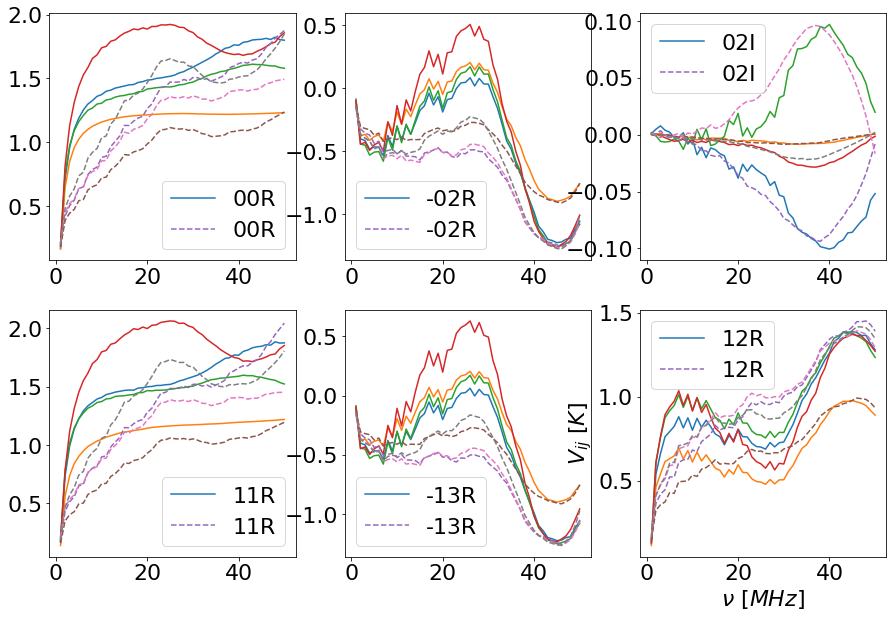

In [74]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2 ,3,figsize=(15,10))
we = (freq/10)**2.5/1e5
axl = [ax1,ax2,ax3,ax4,ax5,ax6]

for ii,comb in enumerate(['00R','-02R','02I','11R','-13R','12R']):
    for daydata,clr in [(data_lbl,'-'), (data_bnl,'--')]:
        xa = lambda x: x
        for day in np.arange(0,28,7):
            axl[ii].plot(freq,daydata[day,comb,:]*we,  clr,label = xa(comb))
            xa = lambda x: None
[ax.legend() for ax in axl]
plt.xlabel('$\\nu\ [MHz]$')
plt.ylabel('$V_{ij}\ [K]$')
#plt.semilogy()

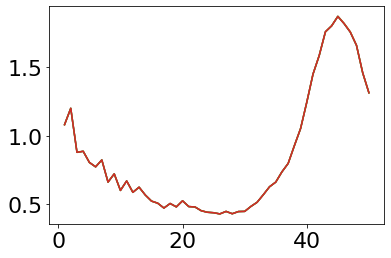

In [76]:
data1=data_lbl
data2=data_lbl2
for day in np.arange(0,28,7):
    NN = data1[day,'00R',:]
    SS = data1[day,'22R',:]
    NS = data1[day,'02R',:]
    #plt.plot(freq,data2[day,'00R',:]*we,'r-',label = '2port')
    #plt.plot(freq,((NN+SS-2*NS))*we,'b-',label = '1port')
    plt.plot(freq,data2[day,'00R',:]/(NN+SS-2*NS) )
    